    Year   Time
0   1896  12.00
1   1900  11.00
2   1904  11.00
3   1906  11.20
4   1908  10.80
5   1912  10.80
6   1920  10.80
7   1924  10.60
8   1928  10.80
9   1932  10.30
10  1936  10.30
11  1948  10.30
12  1952  10.40
13  1956  10.50
14  1960  10.20
15  1964  10.00
16  1968   9.95
17  1972  10.14
18  1976  10.06
19  1980  10.25
20  1984   9.99
21  1988   9.92
22  1992   9.96
23  1996   9.84
24  2000   9.87
25  2004   9.85
26  2008   9.69
K Fold BEGINS HERE
Starting while iter
    Const  Year
6       1  1920
7       1  1924
8       1  1928
9       1  1932
10      1  1936
11      1  1948
12      1  1952
13      1  1956
14      1  1960
15      1  1964
16      1  1968
17      1  1972
18      1  1976
19      1  1980
20      1  1984
21      1  1988
22      1  1992
23      1  1996
24      1  2000
25      1  2004
26      1  2008
[[  3.03576000e+01]
 [ -1.02642317e-02]]
12.0 1896.0 10.8966166247
11.0 1900.0 10.8555596977
11.0 1904.0 10.8145027708
11.2 1906.0 10.7939743073
10.8 1908.0 10.7

/opt/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


[[  1.04167465e+01]
 [  4.62734917e-06]
 [  2.37627589e-09]
 [  1.22061278e-12]
 [  6.27154038e-16]
 [  3.22909284e-19]]
10.14 1972.0 10.4635869729
10.06 1976.0 10.4638753318
10.25 1980.0 10.4641652658
9.99 1984.0 10.4644567819
9.92 1988.0 10.4647498876
2.0411448481
    Const  Year   Order2      Order3          Order4             Order5
0       1  1896  3594816  6815771136  12922702073856  24501443132030976
1       1  1900  3610000  6859000000  13032100000000  24760990000000000
2       1  1904  3625216  6902411264  13142191046656  25022731752833024
3       1  1906  3632836  6924185416  13197497402896  25154430049919776
4       1  1908  3640464  6946005312  13252978135296  25286682282144768
5       1  1912  3655744  6989782528  13364464193536  25552855538040832
6       1  1920  3686400  7077888000  13589544960000  26091926323200000
7       1  1924  3701776  7122217024  13703145554176  26364852046234624
8       1  1928  3717184  7166730752  13817456889856  26640056883642368
9       1  19

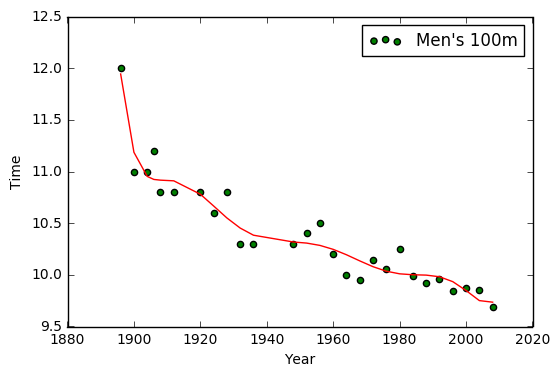

In [43]:
%matplotlib inline
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cross_validation as cv

def linreg(data, degree):
    global toMatrix
    check = toMatrix.as_matrix()
   

    matrixt = toMatrix.as_matrix(columns=['Time'])
    #toMatrix = toMatrix.drop('Time', 1)
    toMatrix = toMatrix.drop('Time', 1)
    toMatrix.insert(0, 'Const', 1)
    #print (toMatrix)
    
    
    count = 1
    if degree > 1:
        while count < degree:
            count = count + 1
            toMatrix['Order' + str(count)] = toMatrix['Year']**count
    #print (toMatrix)
    matrixX = toMatrix.as_matrix()
    matrixXt = matrixX.transpose()
    invert = np.linalg.inv(np.matmul(matrixXt, matrixX))
    term2 = np.matmul(matrixXt, matrixt)
    return np.matmul(invert, term2)
  
def linreg2(data, degree):
    
    matrixt = data.as_matrix(columns=['Time'])
    #toMatrix = toMatrix.drop('Time', 1)
    data = data.drop('Time', 1)
    data.insert(0, 'Const', 1)
    
    count = 1
    if degree > 1:
        while count < degree:
            count = count + 1
            data['Order' + str(count)] = data['Year']**count
    print (data)
    matrixX = data.as_matrix()
    matrixXt = matrixX.transpose()
    invert = np.linalg.inv(np.matmul(matrixXt, matrixX))
    term2 = np.matmul(matrixXt, matrixt)
    return np.matmul(invert, term2)

def predict(w, year, degree, norm):
    if norm==0:
        meanminus = year - yearmean
        year = meanminus/yearstd
    
    y = w[1,0]*year+w[0,0]
    count = 1   
    while count < degree:
        count = count + 1
        y = y + year**count * w[count,0]
    #print (y)
    return y
    

def scaleData(data, row, option):
    #print(yearmean)
    
    if (option == 1):
        for index,rows in data.iterrows():            
             
            meanminus = rows[row] - yearmean
            newframe = meanminus/yearstd
            data[row].iloc[index] = newframe 
            
    return data
            



male100 = pd.read_csv('male100.csv', header = 0)
female100 = pd.read_csv('female100.csv',header=0)

#male100.to_csv('demo.csv')

#male100.plot(x=0,y=1, kind ='scatter', color='g', marker='v'', label="Men’s 100m")

print (male100)
copymale100 = male100.copy()
#print(copymale100)
timemean = copymale100['Time'].mean()
timestd = copymale100['Time'].std()

yearmean = copymale100['Year'].mean()
yearstd = copymale100['Year'].std()

#To get some basic statistics, we can use the describe() method:
#print copymale100['Time'].describe(), "\n"
#print (yearmean, yearstd)




copymale100 = scaleData(copymale100, 'Year', 1)
#print(copymale100)

toMatrix = copymale100.copy()
degree = 8
w = linreg(copymale100, degree)
#print (w)
ax = male100.plot(x=0,y=1, kind ='scatter', color='g', label="Men's 100m")
#female100.plot(x=0,y=1, kind ='scatter', color='r', label="Women's 100m", ax = ax)
#print (toMatrix)
y = w[1,0]*copymale100['Year']+w[0,0]
count = 1
while count < degree:
    count = count + 1
    y = y + toMatrix['Order' + str(count)] * w[count,0]
plt.plot(male100['Year'],y,'r-',color = 'r')

#print (predict(w, 2020, degree, 0))

print ("K Fold BEGINS HERE")
copymale100 = male100.copy()

k = 5
kf = cv.KFold(len(copymale100), n_folds=k)
rmseList = []
deg = 5
count = 1
while count <= deg:
    rmse = 0
    totalLoss = 0
    print ("Starting while iter")
    for train_index, test_index in kf:
        #print (train_index, test_index)
        toCheck = copymale100.copy()
        #print ("Code against you??")
        #print (toCheck)
        toCheck = toCheck.drop(toCheck.index[test_index])
        #toCheck = toCheck.iloc[train_index].copy()
        #print ("After drop")
        #print (toCheck)
        wW = linreg2(toCheck, count)
        print (wW)
        nObs = 0
        subLoss = 0
        for x in np.nditer(test_index):
            nObs = nObs + 1
            #print (x)
            #print (copymale100)
            testT = copymale100.ix[int(x), 1]
            testYear = copymale100.ix[int(x), 0]
            
            testPredict = predict(wW, testYear, count, 1)
            print (testT, testYear, testPredict)
            subLoss = subLoss + (testT - testPredict) * (testT - testPredict)
        subLoss = np.sqrt(subLoss/nObs)
        rmse += subLoss
        print (rmse)
        #print (nObs)
    rmse = (rmse/k)
    rmseList.append(rmse)
    count = count + 1

print("_______________________________")
print (rmseList)
        #print (predict(wW, -1.580157, 2, 1))